# Forecasting

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [117]:
df = pd.read_csv('london_weather.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


## Opis karakteristika
| Karakteristika | Opis
| -------- | ------- |
| date | Datum merenja |
| cloud_cover | Oblačnost merena u oktama |
| sunshine | Broj sunčanih sati u danu |
| global_radiation | Zračenje mereno u vatima po metru kvadratnom |
| max_temp  | Maksimalna temperatura u toku dana |
| mean_temp  | Srednja temperatura u toku dana   |
| min_temp |  Minimalna temperatura u toku dana |
| precipitation |  Padavine izražene u milimetrima   |
| pressure | Atmosferski pritisak izražen u Paskalima  |
| snow_depth | Visina snežnog pokrivača u milimetrima   |

In [118]:
df.isna().sum().sort_values(ascending=False)

snow_depth          1441
mean_temp             36
cloud_cover           19
global_radiation      19
max_temp               6
precipitation          6
pressure               4
min_temp               2
date                   0
sunshine               0
dtype: int64

In [119]:
df['snow_depth']=df['snow_depth'].fillna(0)

In [ ]:
df['date'].head()

0    19790101
1    19790102
2    19790103
3    19790104
4    19790105
Name: date, dtype: int64

In [121]:
df['date']= pd.to_datetime(df['date'],format='%Y%m%d',errors='coerce')

In [122]:
print(df['date'].max())
print(df['date'].min())
df = df.set_index("date")

2020-12-31 00:00:00
1979-01-01 00:00:00


In [123]:
interp_cols = ['max_temp', 'min_temp', 'mean_temp', 'pressure',
               'global_radiation', 'cloud_cover',"precipitation"]

# time-aware interpolation; limit avoids long bridges
df[interp_cols] = (
    df[interp_cols]
      .interpolate(method='time', limit=3, limit_direction='both')
      .ffill().bfill()
)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15341 non-null  float64
 1   sunshine          15341 non-null  float64
 2   global_radiation  15341 non-null  float64
 3   max_temp          15341 non-null  float64
 4   mean_temp         15341 non-null  float64
 5   min_temp          15341 non-null  float64
 6   precipitation     15341 non-null  float64
 7   pressure          15341 non-null  float64
 8   snow_depth        15341 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


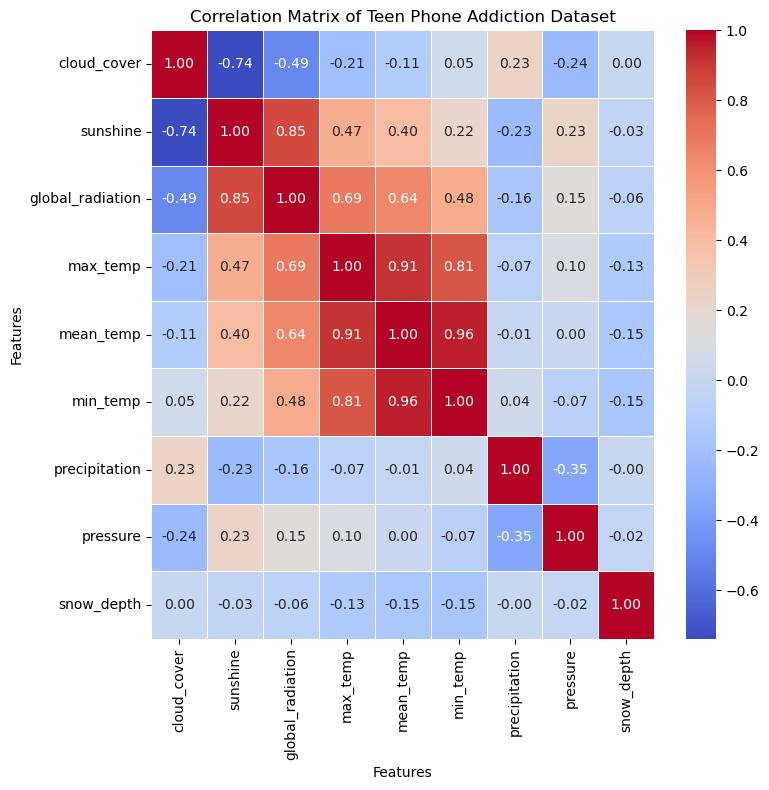

In [125]:
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 8))
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

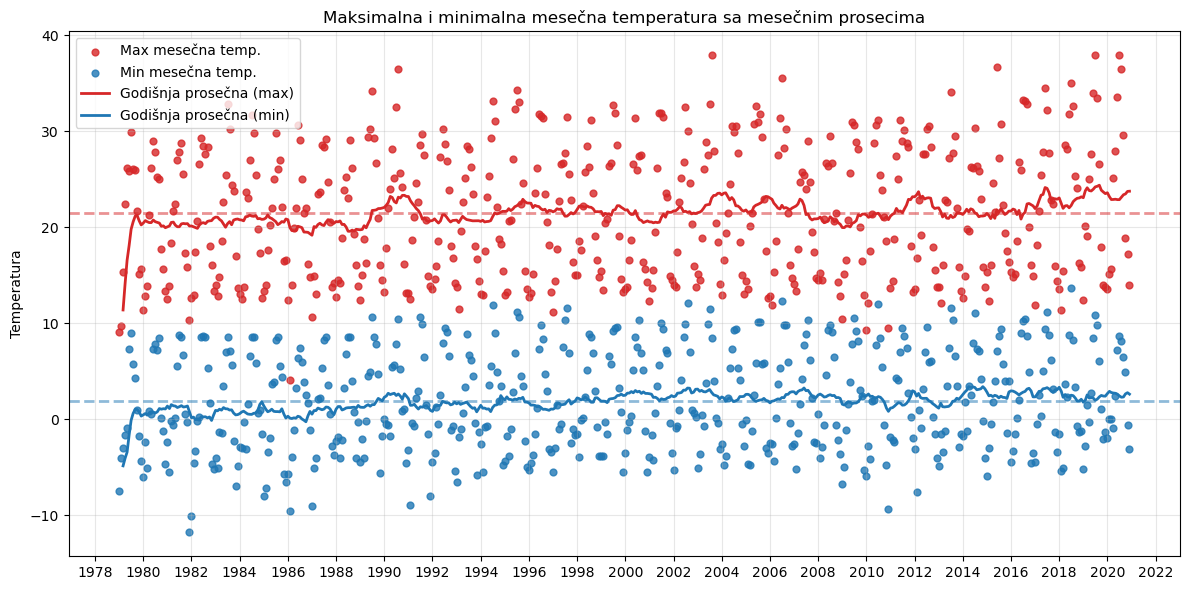

In [126]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Mesečni ekstremi temperatura
mx = df['max_temp'].resample('MS').max()
mn = df['min_temp'].resample('MS').min()

# Rolling averages (12 months; tweak window as needed)
window = 12
mx_ma = mx.rolling(window, min_periods=3).mean()
mn_ma = mn.rolling(window, min_periods=3).mean()

fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(mx.index, mx.values, color='tab:red', s=24, alpha=0.8, label='Max mesečna temp.')
ax.scatter(mn.index, mn.values, color='tab:blue', s=24, alpha=0.8, label='Min mesečna temp.')

ax.plot(mx_ma.index, mx_ma.values, color='tab:red', lw=2, label=f'Godišnja prosečna (max)')
ax.plot(mn_ma.index, mn_ma.values, color='tab:blue', lw=2, label=f'Godišnja prosečna (min)')

# Optional overall mean (dashed)
ax.axhline(mx.mean(), color='tab:red', ls='--', lw=2, alpha=0.5)
ax.axhline(mn.mean(), color='tab:blue', ls='--', lw=2, alpha=0.5)

ax.set_title('Maksimalna i minimalna mesečna temperatura sa mesečnim prosecima')
ax.set_xlabel('')
ax.set_ylabel('Temperatura')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))      # prikaz svake 2 godine
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(loc="best")
plt.tight_layout()


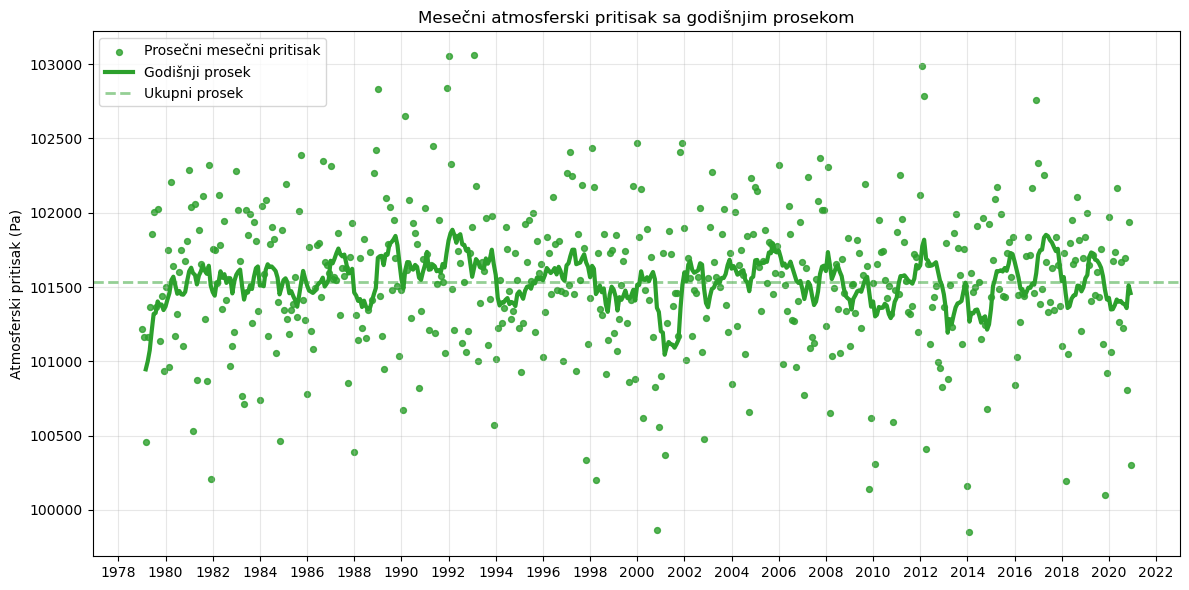

In [127]:
mean_p = df['pressure'].resample('MS').mean()
mean_ma = mean_p.rolling(12, min_periods=3).mean()
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(mean_p.index, mean_p.values, s=18, color='tab:green', alpha=0.8, label='Prosečni mesečni pritisak')
ax.set_ylabel('Atmosferski pritisak (Pa)')
ax.plot(mean_ma.index, mean_ma.values, color='tab:green', lw=3, label='Godišnji prosek')
ax.axhline(mean_p.mean(), color='tab:green', ls='--', lw=2, alpha=0.5, label='Ukupni prosek')
ax.set_title('Mesečni atmosferski pritisak sa godišnjim prosekom')
ax.xaxis.set_major_locator(mdates.YearLocator(2))      # prikaz svake 2 godine
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(loc="best")
plt.tight_layout()
plt.show()

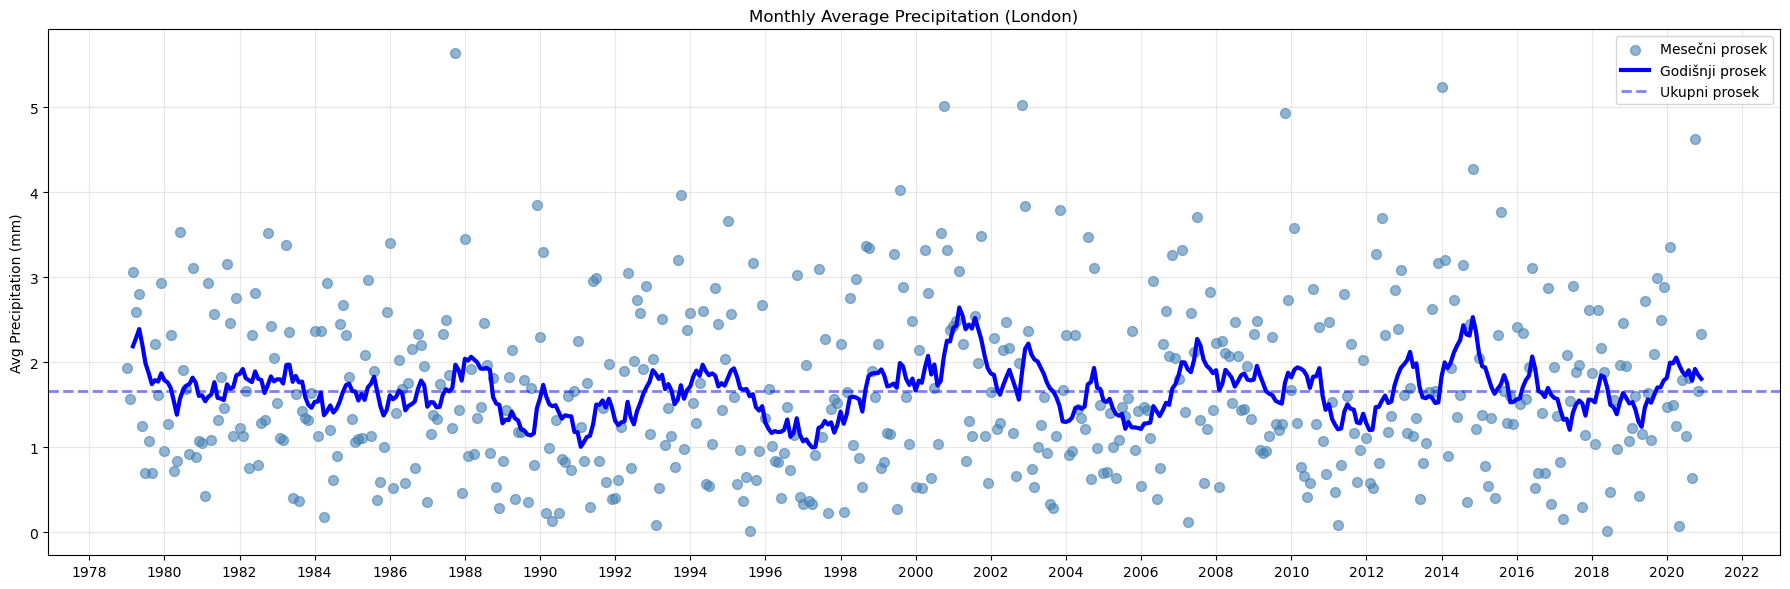

In [128]:
monthly_precip = df["precipitation"].resample("MS").mean()
mean_mp = monthly_precip.rolling(12, min_periods=3).mean()
# Plot monthly averages (with time index)
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(monthly_precip.index, monthly_precip.values, color="steelblue", s=50, alpha=0.6, label='Mesečni prosek')
ax.plot(mean_mp.index, mean_mp.values, color='blue', lw=3, label='Godišnji prosek')
ax.axhline(monthly_precip.mean(), color='blue', ls='--', lw=2, alpha=0.5, label='Ukupni prosek')
ax.set_title("Monthly Average Precipitation (London)")
ax.set_ylabel("Avg Precipitation (mm)")
ax.xaxis.set_major_locator(mdates.YearLocator(2))      # prikaz svake 2 godine
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(loc="best")
plt.tight_layout()
plt.show()

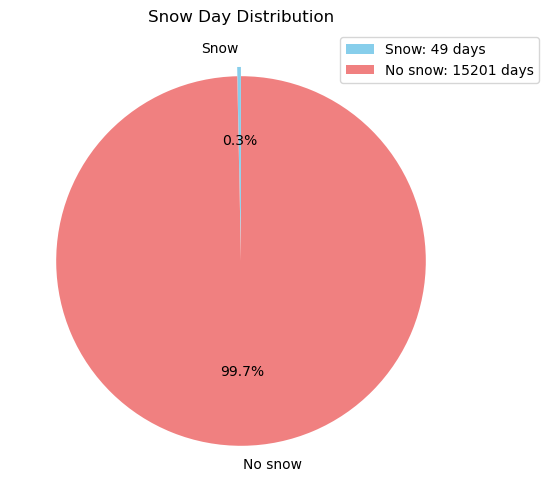

In [129]:
# Create target variable distribution
snow_counts = pd.Series({
    "Snow": df['snow_depth'].where(lambda x: x>0).value_counts().values[0],
    "No snow": df['snow_depth'].where(lambda x: x==0).value_counts().values[0]
})

# Pie chart
plt.figure(figsize=(6, 6))
snow_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "lightcoral"],
    explode=(0.05, 0)
)
plt.title("Snow Day Distribution")
labels = [f"{cat}: {count} days" for cat, count in snow_counts.items()]
plt.legend(labels,bbox_to_anchor=(0.7, 1))
plt.ylabel("")
plt.show()

In [130]:
df['rain_tomorrow']=df['precipitation'].shift(-1).astype(bool)
df["rain_tomorrow"] = df["rain_tomorrow"].astype(int)
df=df.iloc[:-1]

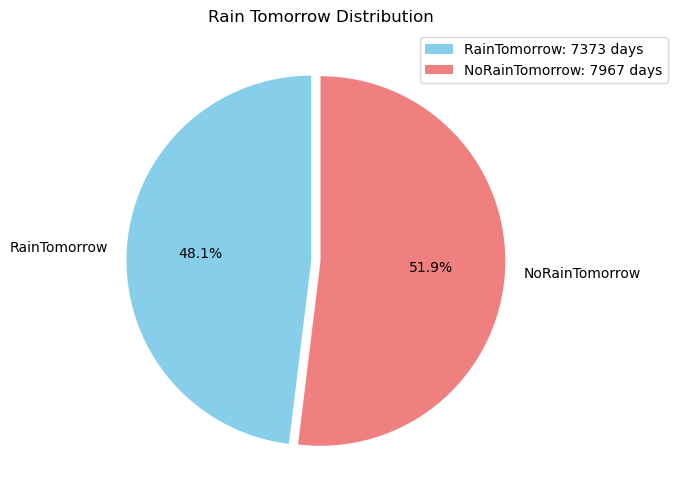

In [131]:
# Create target variable distribution
rain_counts = pd.Series({
    "RainTomorrow": df['rain_tomorrow'].where(lambda x: x==1).value_counts().values[0],
    "NoRainTomorrow": df['rain_tomorrow'].where(lambda x: x==0).value_counts().values[0]
})

# Pie chart
plt.figure(figsize=(6, 6))
rain_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "lightcoral"],
    explode=(0.05, 0)
)
plt.title("Rain Tomorrow Distribution")
plt.ylabel("")
labels = [f"{cat}: {count} days" for cat, count in rain_counts.items()]
plt.legend(labels,bbox_to_anchor=(0.7, 1))
plt.show()

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15340 entries, 1979-01-01 to 2020-12-30
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15340 non-null  float64
 1   sunshine          15340 non-null  float64
 2   global_radiation  15340 non-null  float64
 3   max_temp          15340 non-null  float64
 4   mean_temp         15340 non-null  float64
 5   min_temp          15340 non-null  float64
 6   precipitation     15340 non-null  float64
 7   pressure          15340 non-null  float64
 8   snow_depth        15340 non-null  float64
 9   rain_tomorrow     15340 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.2 MB


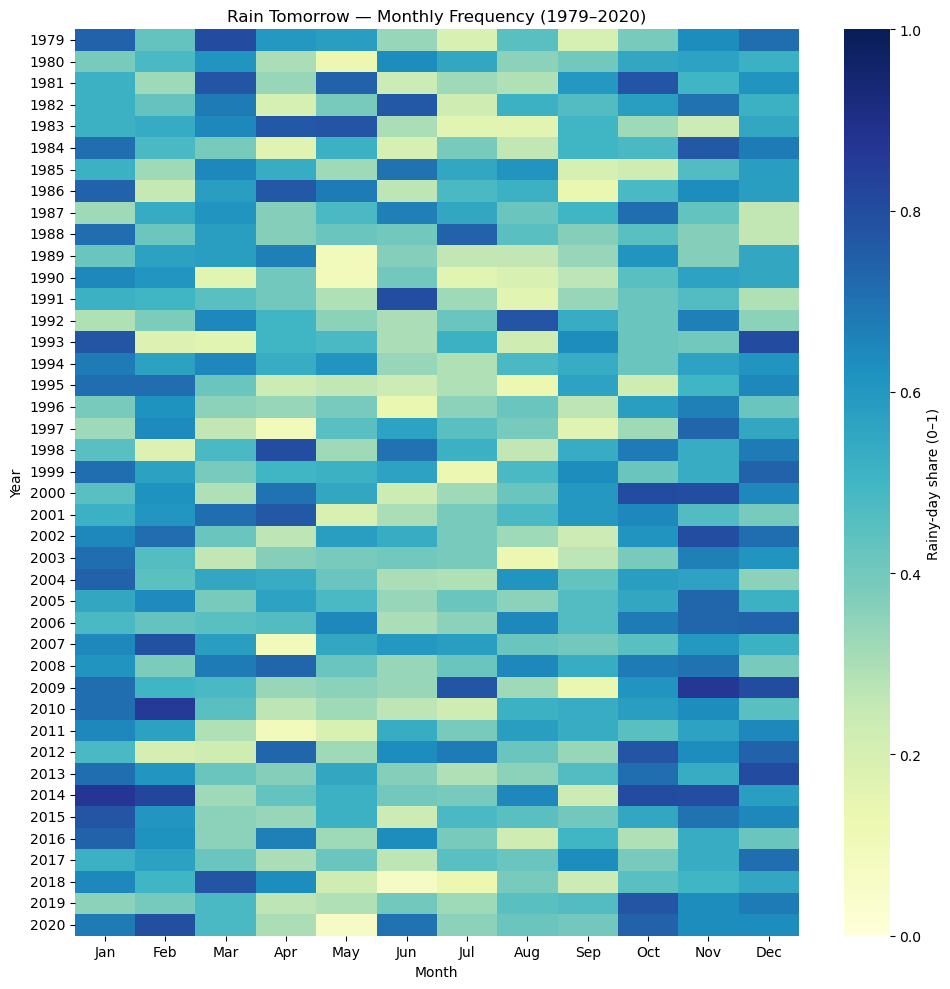

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# monthly rain frequency
monthly = (
    df["rain_tomorrow"]
    .resample("MS").mean()
    .to_frame("rain_freq")
)
monthly["Year"] = monthly.index.year
monthly["Month"] = monthly.index.month

pivot = monthly.pivot(index="Year", columns="Month", values="rain_freq")
pivot = pivot.sort_index()  # years ascending

plt.figure(figsize=(10, 10))
sns.heatmap(
    pivot, 
    annot=False, 
    vmin=0, vmax=1,
    cmap="YlGnBu", 
    cbar_kws={"label": "Rainy-day share (0–1)"}
)
plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Rain Tomorrow — Monthly Frequency (1979–2020)")
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.xticks(np.arange(12)+0.5, months, rotation=0)
plt.tight_layout(); plt.show()


In [134]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 1979-01-01 to 2020-12-01
Freq: MS
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rain_freq  504 non-null    float64
 1   Year       504 non-null    int32  
 2   Month      504 non-null    int32  
dtypes: float64(1), int32(2)
memory usage: 11.8 KB


In [135]:
# --- 1. Rainiest & driest MONTHS ---
rainiest_month = monthly.loc[monthly["rain_freq"].idxmax()]
driest_month   = monthly.loc[monthly["rain_freq"].idxmin()]

print("🌧️ Rainiest Month:")
print(f"Year: {rainiest_month['Year']}, Month: {months[int(rainiest_month['Month'])-1]}, "
      f"Rain Frequency: {rainiest_month['rain_freq']:.2f}")

print("\n☀️ Driest Month:")
print(f"Year: {driest_month['Year']}, Month: {months[int(driest_month['Month'])-1]}, "
      f"Rain Frequency: {driest_month['rain_freq']:.2f}")


# --- 2. Rainiest & driest YEARS ---
yearly = monthly.groupby("Year")["rain_freq"].mean()

rainiest_year = yearly.idxmax()
driest_year   = yearly.idxmin()

print("\n📅 Rainiest Year:")
print(f"Year: {rainiest_year}, Avg Rain Frequency: {yearly.max():.2f}")

print("\n📅 Driest Year:")
print(f"Year: {driest_year}, Avg Rain Frequency: {yearly.min():.2f}")


🌧️ Rainiest Month:
Year: 2014.0, Month: Jan, Rain Frequency: 0.87

☀️ Driest Month:
Year: 2020.0, Month: May, Rain Frequency: 0.06

📅 Rainiest Year:
Year: 2014, Avg Rain Frequency: 0.57

📅 Driest Year:
Year: 1990, Avg Rain Frequency: 0.37


In [136]:
monthly['rain_freq'].max()
monthly['rain_freq'].min()

0.06451612903225806

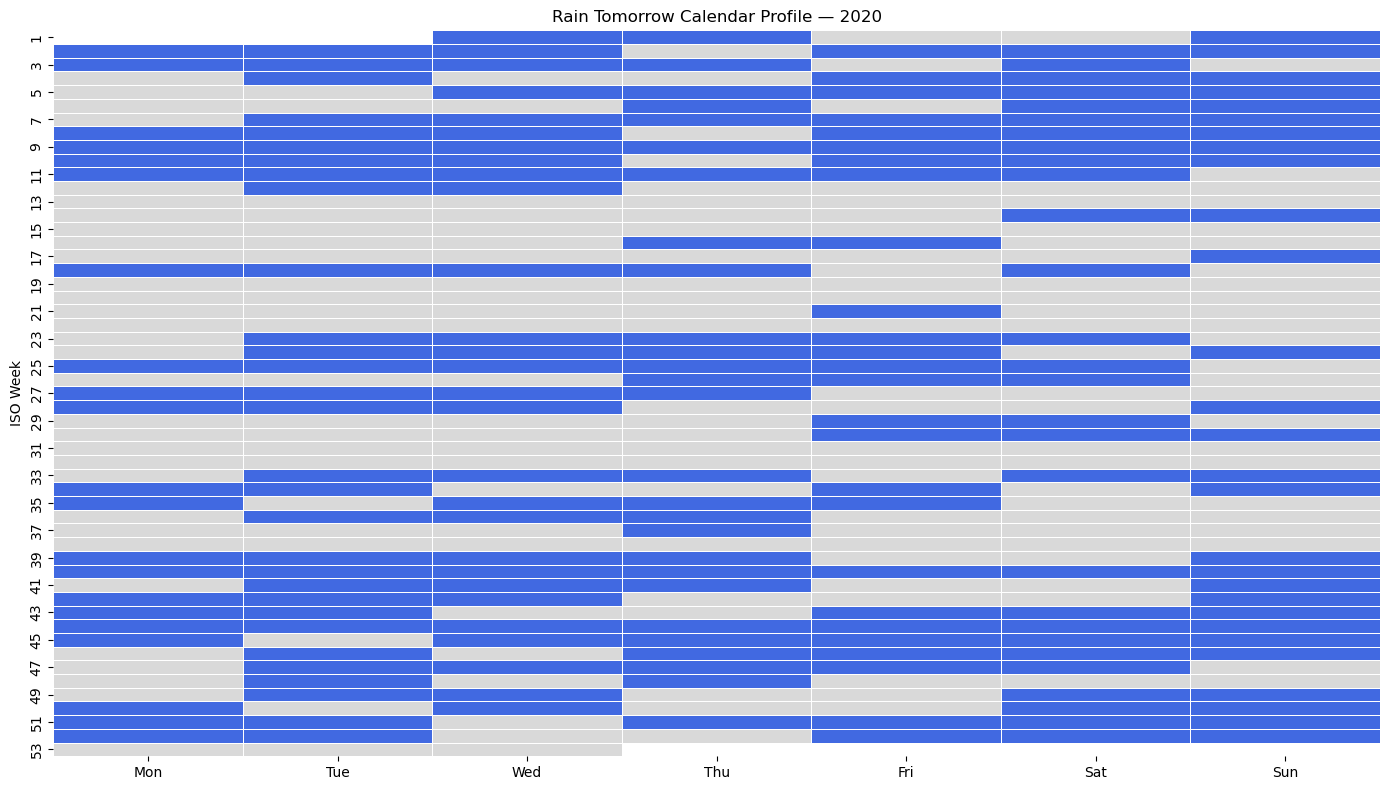

In [137]:
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

def plot_calendar_profile(df, year):
    # Full daily index for that year
    all_days = pd.date_range(f"{year}-01-01", f"{year}-12-31", freq="D")
    tmp = pd.DataFrame(index=all_days)
    tmp["rain_tomorrow"] = df["rain_tomorrow"].reindex(all_days)

    iso = tmp.index.isocalendar()
    tmp["iso_year"] = iso.year
    tmp["iso_week"] = iso.week
    tmp["iso_weekday"] = iso.day  # Mon=1..Sun=7

    cal = tmp[tmp["iso_year"] == year]

    pivot = cal.pivot(index="iso_week", columns="iso_weekday", values="rain_tomorrow")
    weeks = np.arange(1, 54)
    days = np.arange(1, 8)
    pivot = pivot.reindex(index=weeks, columns=days)

    cmap = ListedColormap(["#d9d9d9", "#4169e1"])  # gray=0, blue=1

    plt.figure(figsize=(14,8))
    sns.heatmap(
        pivot, cmap=cmap, vmin=0, vmax=1,
        cbar=False, linewidths=0.5, linecolor="white", mask=pivot.isna()
    )
    plt.xticks([i+0.5 for i in range(7)], ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], rotation=0)
    plt.ylabel("ISO Week")
    plt.xlabel("")
    plt.title(f"Rain Tomorrow Calendar Profile — {year}")
    plt.tight_layout()
    plt.show()

# Example: profile for 2019
plot_calendar_profile(df, 2020)


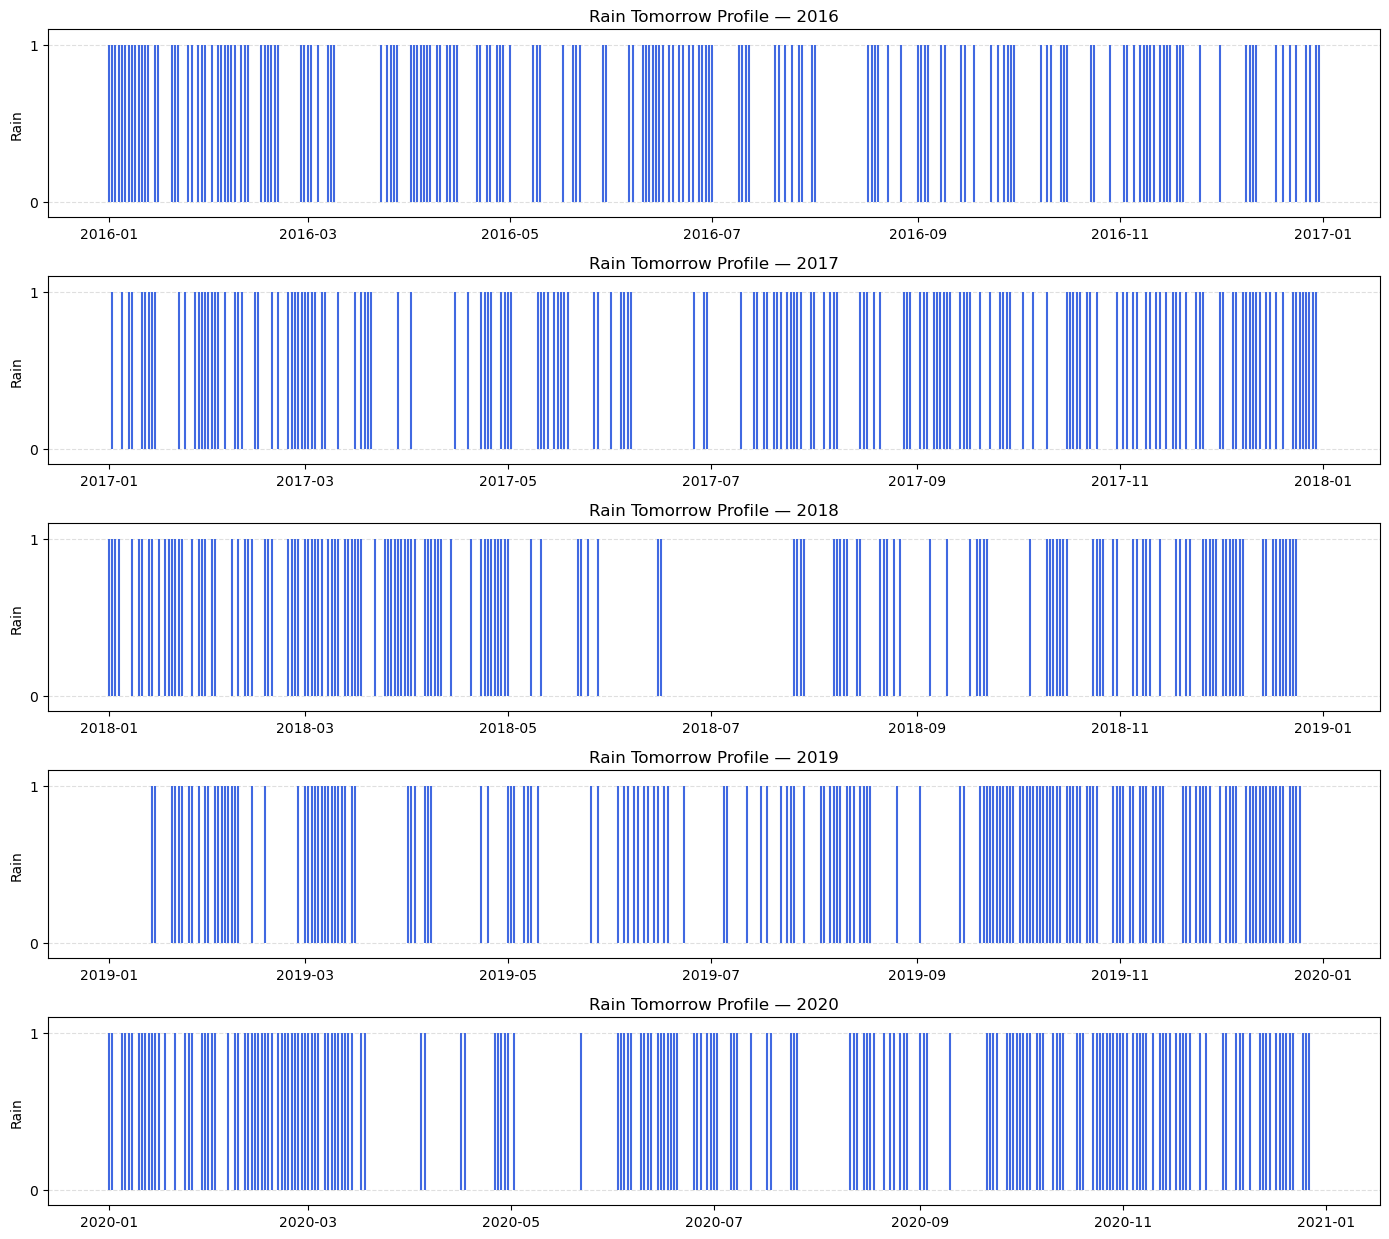

In [138]:
years = [2016, 2017, 2018, 2019, 2020]  # pick any 5 years

fig, axes = plt.subplots(len(years), 1, figsize=(14, 2.5*len(years)), sharey=True)

for ax, y in zip(axes, years):
    df_year = df[df.index.year == y]
    ax.stem(df_year.index, df_year['rain_tomorrow'], 
            linefmt="royalblue", markerfmt=" ", basefmt=" ")
    ax.set_title(f"Rain Tomorrow Profile — {y}")
    ax.set_ylim(-0.1, 1.1)
    ax.grid(axis="y", linestyle="--", alpha=0.4)
    ax.set_yticks([0,1])
    ax.set_ylabel("Rain")

plt.tight_layout()
plt.show()


## Pomoćne funkcije

In [139]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

def plot_conf_matrix(y_test, y_pred,title):
    cm = confusion_matrix(y_test, y_pred)
    cm_sum = cm.sum()
    labels = ["No Rain", "Rain"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots()
    disp.plot(cmap="Greys", ax=ax, colorbar=False, include_values=False)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            count = cm[i, j]
            percent = (count / cm_sum) * 100
            color = "green" if i == j else "red"
            ax.text(
                j, i, f"{count}\n({percent:.1f}%)",
                ha="center", va="center", color=color, fontsize=10, weight="bold"
            )
    plt.title(title)
    plt.show()

def plot_roc_curve(y_test, y_prob):
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc_val = auc(fpr, tpr)

    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc_val:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

def plot_test(y_test,y_pred):
    y_pred_df = pd.DataFrame({
        "y_true": y_test,
        "y_pred": y_pred
    }, index=y_test.index)
    years = [2016, 2017, 2018, 2019, 2020]  # pick any 5 years

    fig, axes = plt.subplots(len(years), 1, figsize=(16, 2.5 * len(years)), sharey=True)

    for ax, y in zip(axes, years):
        df_year = y_pred_df[y_pred_df.index.year == y]

        # Ground truth stem plot
        ax.stem(df_year.index, df_year["y_true"],
                linefmt="royalblue", markerfmt=" ", basefmt=" ")

        # Correct predictions
        correct_mask = df_year["y_true"] == df_year["y_pred"]
        ax.scatter(
            df_year.index[correct_mask],
            df_year["y_true"][correct_mask],
            color="green", marker="o", s=30, label="Correct"
        )

        # Wrong predictions
        ax.scatter(
            df_year.index[~correct_mask],
            df_year["y_true"][~correct_mask],
            color="crimson", marker="x", s=30, label="Wrong"
        )

        ax.set_title(f"Rain Tomorrow Profile — {y}")
        ax.set_ylim(-0.1, 1.1)
        ax.grid(axis="y", linestyle="--", alpha=0.4)
        ax.set_yticks([0, 1])
        ax.set_ylabel("Rain")

    # Legend once for all subplots
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right")

    plt.tight_layout()
    plt.show()
    

## Logistic regression

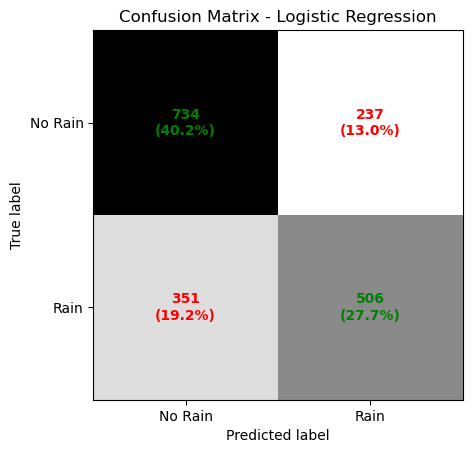

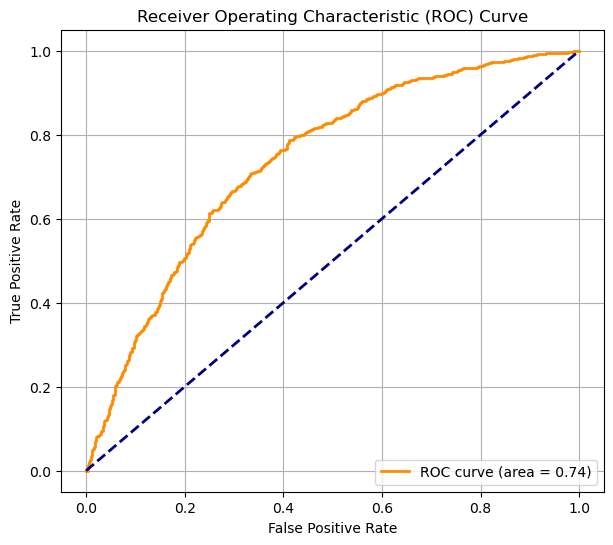

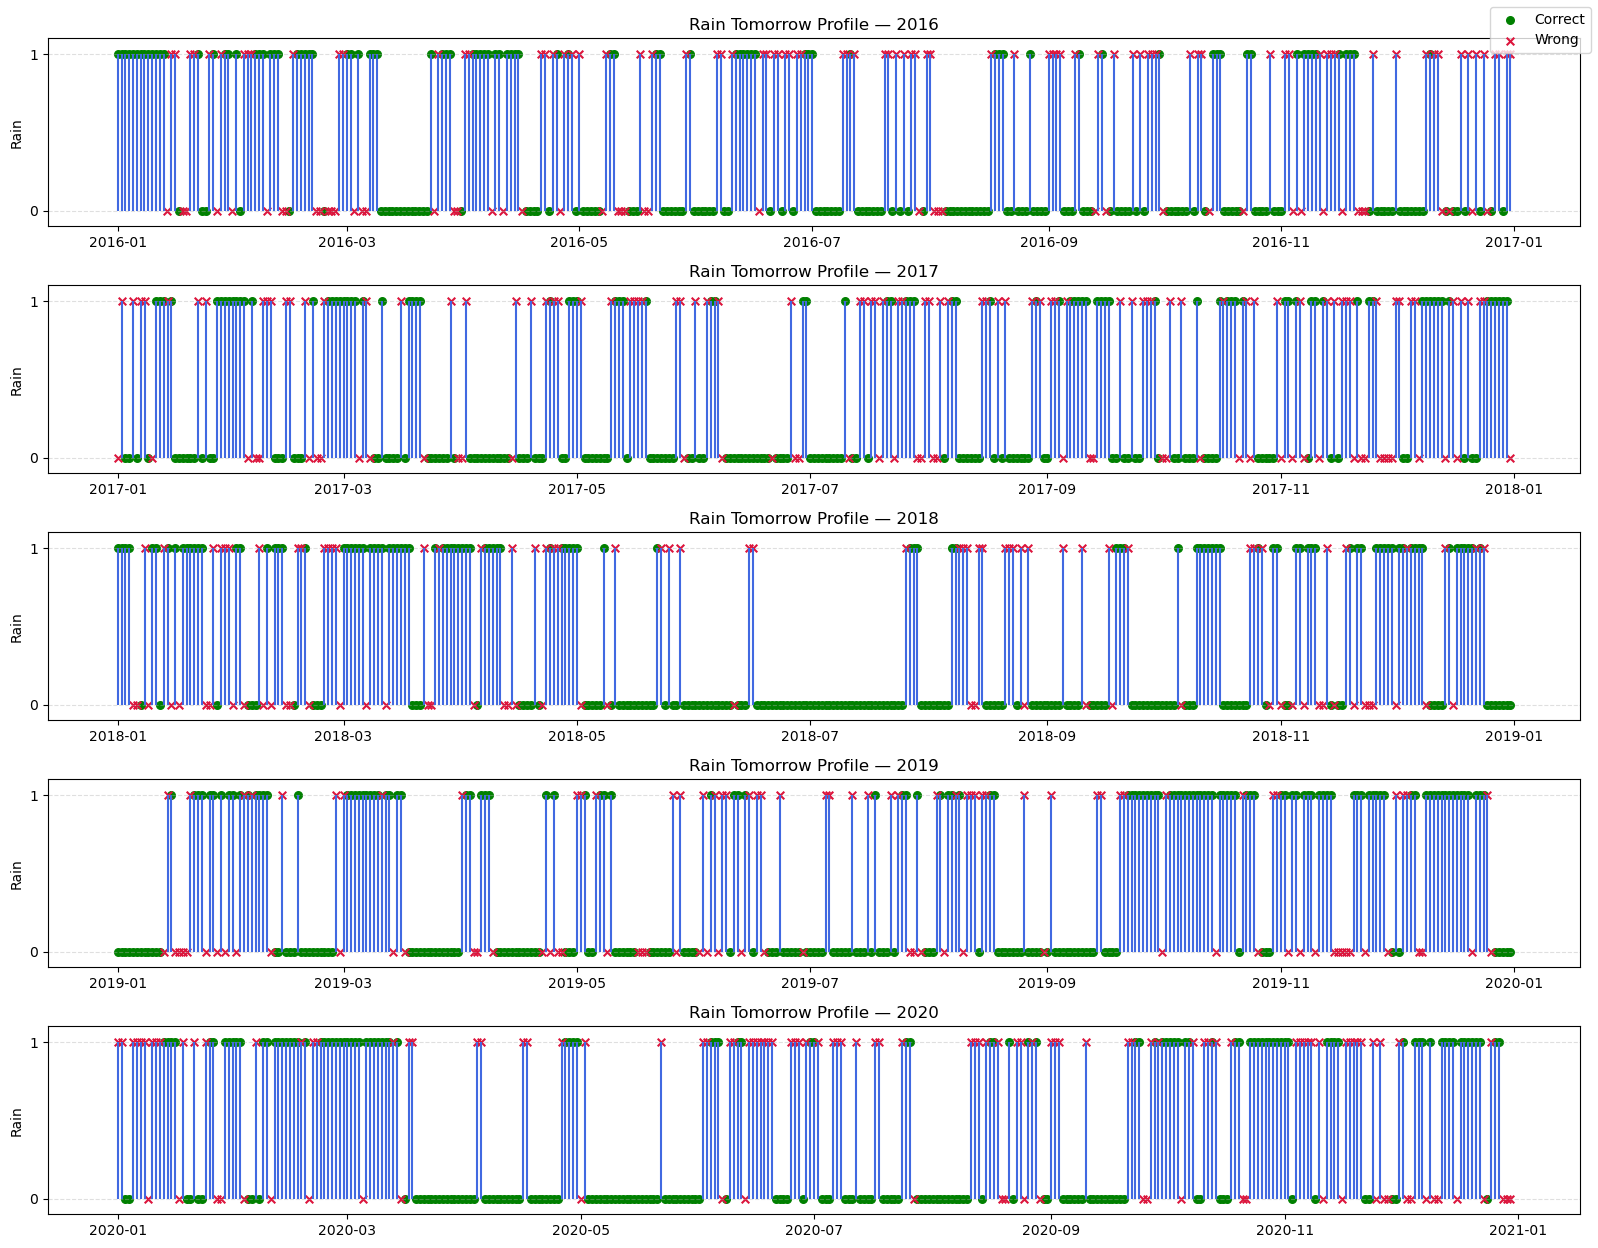

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

train_date = df.index.max() - pd.DateOffset(years=5)

X = df.drop(columns=["precipitation", "rain_tomorrow"])
y = df["rain_tomorrow"]

X_train = X.loc[:train_date]
y_train = y[:train_date]
X_test = X.loc[train_date:]
y_test = y[train_date:]

# Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
report = classification_report(y_test, y_pred, output_dict=True)

plot_conf_matrix(y_test, y_pred,title='Confusion Matrix - Logistic Regression')
plot_roc_curve(y_test, y_prob)
plot_test(y_test,y_pred)

## Priprema skupa podataka

In [141]:
def make_windows(X, y, lookback):
    Xs, ys = [], []
    for i in range(len(X) - lookback):
        Xs.append(X[i:i+lookback].values)
        ys.append(y.iloc[i+lookback])
    return np.array(Xs), np.array(ys)

In [142]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()

features = scaller.fit_transform(df.drop(columns=['rain_tomorrow']))
features = pd.DataFrame(features, columns=df.drop(columns=['rain_tomorrow']).columns)
target = df['rain_tomorrow']
features.index=df.index
target.index=df.index

In [143]:
def make_split(X,y,lookback):
    # Index for each window = end of window
    win_index = features.index[lookback:]  # DatetimeIndex length == len(X)

    # Choose boundaries
    train_end_date = pd.Timestamp("2010-12-31")
    val_end_date   = pd.Timestamp("2015-12-31")

    # Masks over windows
    train_mask = win_index <= train_end_date
    val_mask   = (win_index > train_end_date) & (win_index <= val_end_date)
    test_mask  = win_index > val_end_date

    X_train, y_train = X[train_mask], y[train_mask]
    X_val,   y_val   = X[val_mask],   y[val_mask]
    X_test,  y_test  = X[test_mask],  y[test_mask]
    return X_train,y_train,X_val,y_val,X_test,y_test

In [144]:
X, y = make_windows(features, target, 30)
X_train, y_train, X_val, y_val, X_test, y_test = make_split(X, y,30)

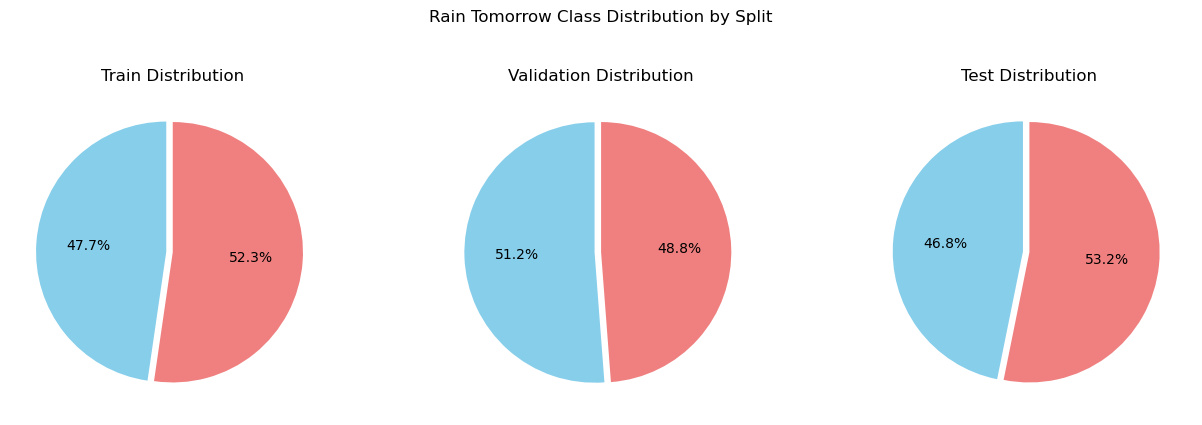

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def class_counts(y):
    y = np.asarray(y).astype(int)
    s = pd.Series([ (y==1).sum(), (y==0).sum() ], index=["RainTomorrow","NoRainTomorrow"])
    return s

# Build series for each split
rain_train = class_counts(y_train)
rain_val   = class_counts(y_val)
rain_test  = class_counts(y_test)

COLORS = ["skyblue", "lightcoral"]   # [Rain, NoRain]

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
for ax, data, title in zip(
    axes,
    [rain_train, rain_val, rain_test],
    ["Train", "Validation", "Test"]
):
    data.plot.pie(
        ax=ax,
        autopct="%1.1f%%",
        startangle=90,
        colors=COLORS,
        explode=(0.05, 0),
        labels=None
    )
    ax.set_title(f"{title} Distribution")
    ax.set_ylabel("")
    ax.set_aspect('equal')

fig.suptitle("Rain Tomorrow Class Distribution by Split", y=1.05, fontsize=12)
plt.tight_layout()
plt.show()


## LTSM

Model 1

In [160]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# --- Windowing function ---
LOOKBACK = 30  # past 30 days

X, y = make_windows(features, target, LOOKBACK)
print("X shape:", X.shape)  # (num_samples, lookback, num_features)
print("y shape:", y.shape)  # (num_samples,)

X_train, y_train, X_val, y_val, X_test, y_test = make_split(X, y,LOOKBACK)

# --- Dataset pipeline ---
BATCH = 1024

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(2048).batch(BATCH).prefetch(2)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH).prefetch(2)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH).prefetch(2)

# --- Build LSTM classifier ---
F = X.shape[-1]  # number of features
model = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.LayerNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(32,return_sequences=False),
    keras.layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l2(1e-4)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")  # binary classification
])

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", keras.metrics.AUC(name="auc")]
)
model.summary()

# --- Train ---
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=40,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
)


X shape: (15310, 30, 9)
y shape: (15310,)
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_54 (LSTM)              (None, 30, 64)            18944     
                                                                 
 layer_normalization_5 (Laye  (None, 30, 64)           128       
 rNormalization)                                                 
                                                                 
 dropout_46 (Dropout)        (None, 30, 64)            0         
                                                                 
 lstm_55 (LSTM)              (None, 32)                12416     
                                                                 
 dense_39 (Dense)            (None, 32)                1056      
                                                                 
 dropout_47 (Dropout)        (None, 32)                0         
           

In [161]:
print(model.metrics_names)   # e.g. ['loss', 'accuracy', 'auc']


['loss', 'accuracy', 'auc']


2/2 [==============================] - 0s 108ms/step - loss: 0.6388 - accuracy: 0.6314 - auc: 0.6893
Test Accuracy: 0.631, AUC: 0.689


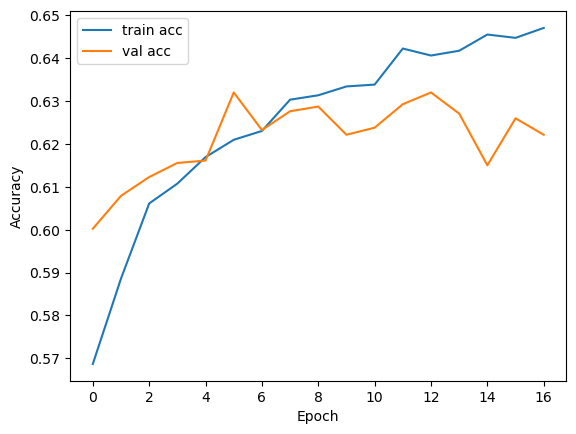

58/58 [==============================] - 1s 5ms/step


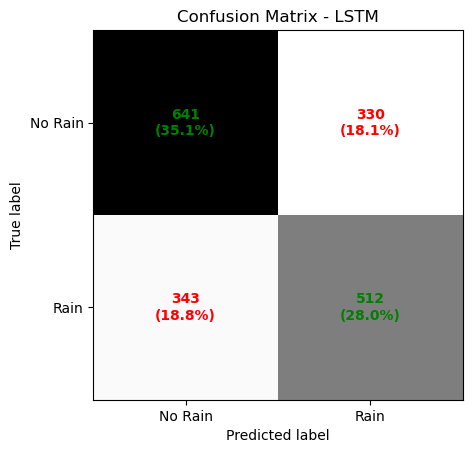

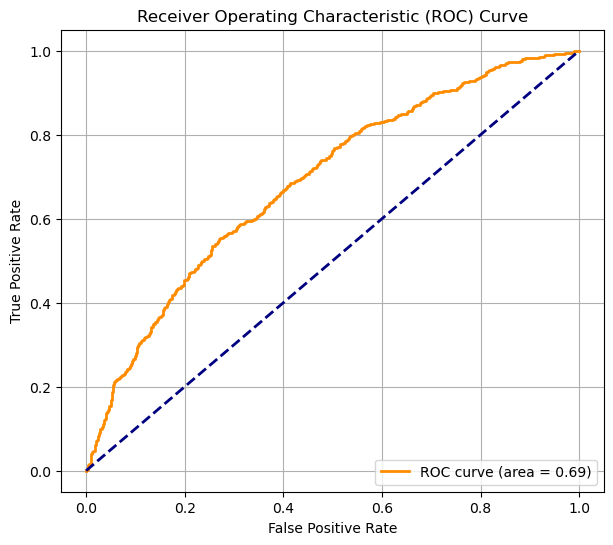

'\nfrom sklearn.metrics import roc_curve, auc\nimport matplotlib.pyplot as plt\n\n# y_pred_prob should be the model\'s probability for class "Rain" (label=1)\nfpr, tpr, thr = roc_curve(y_test, y_pred_prob)  # pos_label=1 by default if labels are {0,1}\nroc_auc = auc(fpr, tpr)\n\nplt.figure(figsize=(6, 6))\nplt.plot(fpr, tpr, lw=2,color=\'darkorange\', label=f"ROC curve (AUC = {roc_auc:.3f})")\nplt.plot([0, 1], [0, 1], linestyle="--", lw=1, label="Chance", alpha=0.7)\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel("False Positive Rate")\nplt.ylabel("True Positive Rate")\nplt.title("ROC Curve – Rain Tomorrow (Test)")\nplt.legend(loc="lower right")\nplt.grid(True, alpha=0.3)\nplt.show()'

In [162]:
# --- Evaluate ---
test_loss, test_acc, test_auc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.3f}, AUC: {test_auc:.3f}")

# --- Plot learning curves ---
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# --- Predict probabilities for test set ---
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int) 

# --- Confusion matrix ---

plot_conf_matrix(y_test, y_pred,title='Confusion Matrix - LSTM')

#plot_roc_curve()

plot_roc_curve(y_test,y_pred_prob)
'''
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_pred_prob should be the model's probability for class "Rain" (label=1)
fpr, tpr, thr = roc_curve(y_test, y_pred_prob)  # pos_label=1 by default if labels are {0,1}
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, lw=2,color='darkorange', label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", lw=1, label="Chance", alpha=0.7)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Rain Tomorrow (Test)")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()'''

Model 2

In [165]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# --- Windowing function ---
LOOKBACK = 14  # past 30 days

X, y = make_windows(features, target, LOOKBACK)
print("X shape:", X.shape)  # (num_samples, lookback, num_features)
print("y shape:", y.shape)  # (num_samples,)

X_train, y_train, X_val, y_val, X_test, y_test = make_split(X, y,LOOKBACK)

# --- Dataset pipeline ---
BATCH = 4096

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(4096).batch(BATCH).prefetch(2)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH).prefetch(2)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH).prefetch(2)

# --- Build LSTM classifier ---
F = X.shape[-1]  # number of features
model = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.Dropout(0.3),
    keras.layers.LSTM(32,return_sequences=False),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation="sigmoid")  # binary classification
])

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", keras.metrics.AUC(name="auc")]
)
model.summary()

# --- Train ---
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)
    ]
)


X shape: (15326, 14, 9)
y shape: (15326,)
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_58 (LSTM)              (None, 14, 64)            18944     
                                                                 
 dropout_50 (Dropout)        (None, 14, 64)            0         
                                                                 
 lstm_59 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_51 (Dropout)        (None, 32)                0         
                                                                 
 dense_42 (Dense)            (None, 1)                 33        
                                                                 
Total params: 31,393
Trainable params: 31,393
Non-trainable params: 0
_________________________________________________________________
Epoch 1

1/1 [==============================] - 0s 30ms/step - loss: 0.6293 - accuracy: 0.6501 - auc: 0.6996
Test Accuracy: 0.650, AUC: 0.700


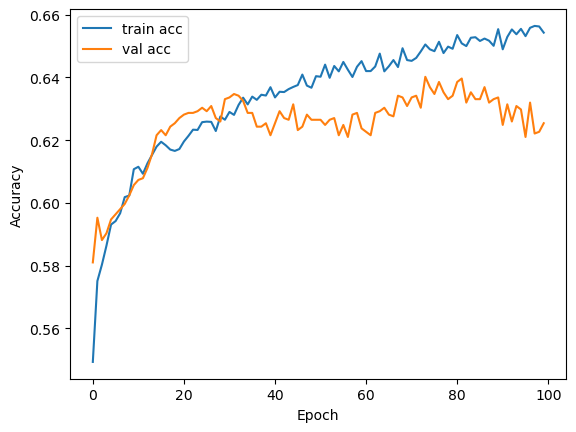

58/58 [==============================] - 1s 3ms/step


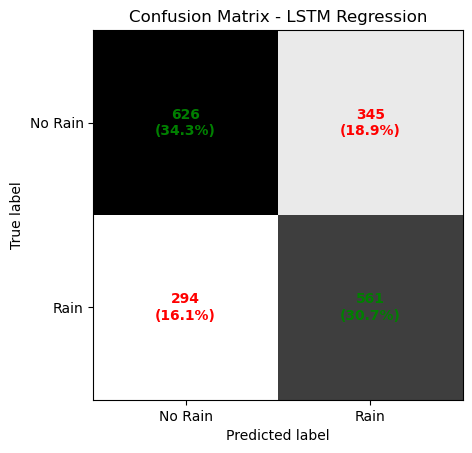

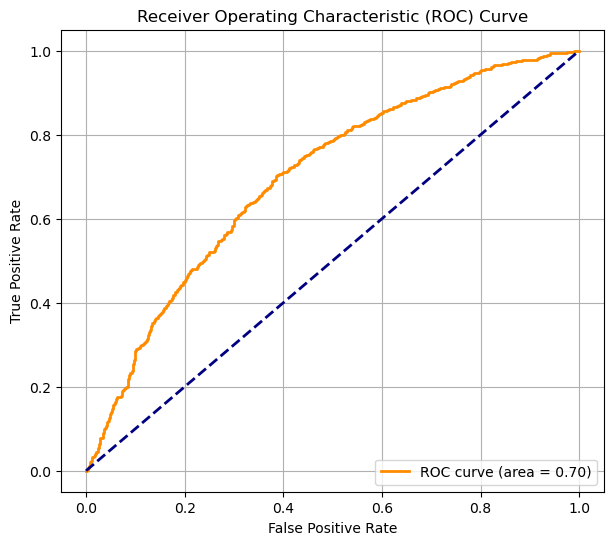

'\nfrom sklearn.metrics import roc_curve, auc\nimport matplotlib.pyplot as plt\n\n# y_pred_prob should be the model\'s probability for class "Rain" (label=1)\nfpr, tpr, thr = roc_curve(y_test, y_pred_prob)  # pos_label=1 by default if labels are {0,1}\nroc_auc = auc(fpr, tpr)\n\nplt.figure(figsize=(6, 6))\nplt.plot(fpr, tpr, lw=2,color=\'darkorange\', label=f"ROC curve (AUC = {roc_auc:.3f})")\nplt.plot([0, 1], [0, 1], linestyle="--", lw=1, label="Chance", alpha=0.7)\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel("False Positive Rate")\nplt.ylabel("True Positive Rate")\nplt.title("ROC Curve – Rain Tomorrow (Test)")\nplt.legend(loc="lower right")\nplt.grid(True, alpha=0.3)\nplt.show()'

In [ ]:
# --- Evaluate ---
test_loss, test_acc, test_auc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.3f}, AUC: {test_auc:.3f}")

# --- Plot learning curves ---
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# --- Predict probabilities for test set ---
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int) 

# --- Confusion matrix ---

plot_conf_matrix(y_test, y_pred,title='Confusion Matrix - LSTM Regression')

#plot_roc_curve()

plot_roc_curve(y_test,y_pred_prob)

## GRU